# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [5]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [7]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [5]:
correlation=app_train.corr()['TARGET'].sort_values()
correlation

EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_EMPLOYED                 -0.044932
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_MODE                -0.043226
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
ELEVATORS_AVG                 -0.034199
ELEVATORS_MEDI                -0.033863
FLOORSMIN_AVG                 -0.033614
FLOORSMIN_MEDI                -0.033394
LIVINGAREA_AVG                -0.032997
LIVINGAREA_MEDI               -0.032739
FLOORSMIN_MODE                -0.032698
TOTALAREA_MODE                -0.032596
ELEVATORS_MODE                -0.032131
LIVINGAREA_MODE               -0.030685
AMT_CREDIT                    -0.030369
APARTMENTS_AVG                -0.029498
APARTMENTS_MEDI               -0.029184
FLAG_DOCUMENT_6               -0.028602
APARTMENTS_MODE               -0.027284
LIVINGAPARTMENTS_AVG          -0.025031


In [6]:
print('head15:',correlation.tail(15))
print('tail15:',correlation.head(15))

head15: DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
tail15: EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEV

In [19]:
#practice,缺點為找不到對應標籤
list(app_train.corr()['TARGET'])[0:15]

[-0.0021084690182032236,
 1.0,
 -0.030895908161216207,
 -0.021850938463875168,
 -0.006148387704583926,
 0.019187133596327993,
 -0.003981865601221981,
 -0.03036928646150375,
 -0.012816561515431712,
 -0.039645281169414404,
 -0.03722714854256482,
 -0.07823930831003195,
 0.07495845742555217,
 0.04197486283152581,
 0.05145717260719229]

In [22]:
list(app_train.corr()['TARGET'])[-16:]

[-0.011583222341345362,
 -0.009463821935602135,
 -0.006535657584127621,
 -0.011614671588333908,
 -0.003377569147433387,
 -0.007952385099503134,
 -0.0013575183243048259,
 0.00021539355797303039,
 0.0037086250293292228,
 0.0009304246097004268,
 0.0027044013780389794,
 0.0007877117489002822,
 -0.01246241922815756,
 -0.002021927435350677,
 0.01992985856946162,
 -0.04598707841544573]

In [38]:
app_train.loc[list(app_train.corr()['TARGET'])==app_train.corr()['TARGET'].min()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
34,100040,0,0,F,0,1,0,135000.0,1125000.0,32895.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False


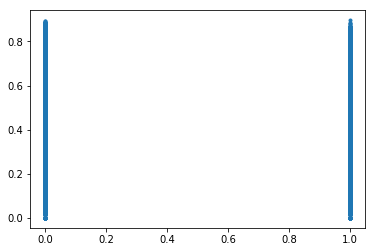

In [46]:
plt.plot(app_train['TARGET'],app_train['EXT_SOURCE_3'],'.')  #看不出來趨勢-->畫另外的圖(ex.box圖)

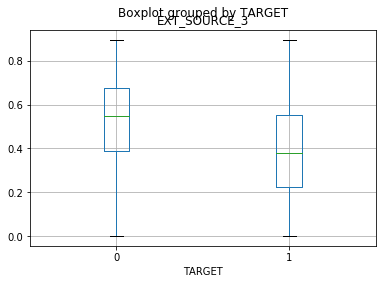

In [15]:
app_train.boxplot(column='EXT_SOURCE_3', by='TARGET')

In [41]:
list(app_train.corr()['TARGET'].value_counts().index)

[0.0007877117489002822,
 0.050994464367959576,
 0.058899014945840766,
 0.0552184835135491,
 -0.17891869762805598,
 -0.0031761075207262903,
 0.009022143630254362,
 0.019187133596327993,
 -0.02208126137315907,
 -0.002757148602115651,
 -0.01246241922815756,
 -0.044003370532464434,
 0.01992985856946162,
 -0.0015565608459019442,
 -0.03361350325191881,
 -0.009036447354299915,
 -0.022068203834843144,
 0.009307784396530822,
 0.0003701268023512289,
 -0.012816561515431712,
 -0.034198793675268006,
 -0.012710543748866843,
 -0.021850938463875168,
 -0.043767921047647734,
 -0.013578069781948561,
 0.04439537480589986,
 -0.032595546758925106,
 0.006941907545423441,
 -0.0003157774166440568,
 -0.011614671588333908,
 0.04598221971656028,
 -0.006148387704583926,
 -0.008040384466111536,
 0.04197486283152581,
 0.0009304246097004268,
 -0.010884822678803389,
 0.00021539355797303039,
 -0.030895908161216207,
 -0.000755750704352764,
 -0.003981865601221981,
 -0.024620663606522288,
 0.03251834110161418,
 -0.0115832

# 觀察
- 可以看到 `DAYS_BIRTH` 有最高的正相關，不過還記得這個欄位的值其實是負值，表示說客戶的年紀越大，他們越不會發生遲繳貸款的狀況
- 這樣有一點混淆，我們就取一下這個欄位的絕對值吧，那麼這個欄位與 TARGET 就會變為負相關

-0.07823930830982712


Text(0,0.5,'TARGET')

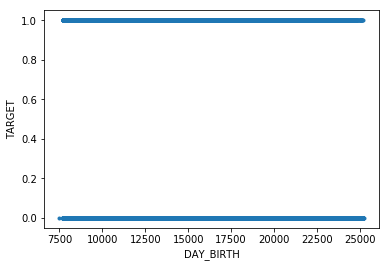

In [10]:
app_train['DAYS_BIRTH']=abs(app_train['DAYS_BIRTH'])
print(app_train['DAYS_BIRTH'].corr(app_train['TARGET']))
plt.plot(app_train['DAYS_BIRTH'],app_train['TARGET'],'.')
plt.xlabel('DAY_BIRTH')
plt.ylabel('TARGET')

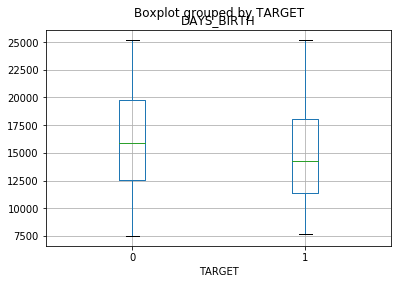

In [16]:
app_train.boxplot(column='DAYS_BIRTH', by='TARGET')